<a href="https://colab.research.google.com/github/ancestor9/MODELING-AND-SIMULATION/blob/main/Bernoulli_binomial_normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from scipy.stats import bernoulli

# 1. 확률 설정 (성공 확률 p = 0.6)
p = 0.6
rv = bernoulli(p)  # 확률 변수(Random Variable) 객체 생성

# 2. 확률 질량 함수 (PMF): P(X=k)
prob_failure = rv.pmf(0) # 실패(0)할 확률 (= 0.4)
prob_success = rv.pmf(1) # 성공(1)할 확률 (= 0.6)

print(f"실패 확률 P(X=0): {prob_failure:.2f}")
print(f"성공 확률 P(X=1): {prob_success:.2f}")

# 3. 누적 분포 함수 (CDF): P(X <= k)
print(f"CDF (k=0): {rv.cdf(0):.2f}") # P(X=0)
print(f"CDF (k=1): {rv.cdf(1):.2f}") # P(X=0) + P(X=1)

# 4. 통계량 (평균, 분산)
mean, var = rv.stats(moments='mv')
print(f"평균(Mean): {mean}, 분산(Variance): {var}")

실패 확률 P(X=0): 0.40
성공 확률 P(X=1): 0.60
CDF (k=0): 0.40
CDF (k=1): 1.00
평균(Mean): 0.6, 분산(Variance): 0.24


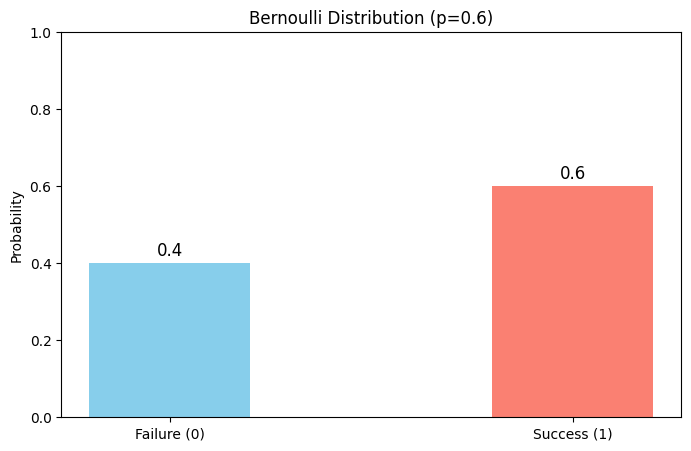

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

# 데이터 설정
p = 0.6
rv = bernoulli(p)
x = [0, 1]
probs = [rv.pmf(k) for k in x]

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(x, probs, color=['skyblue', 'salmon'], width=0.4)

# 꾸미기
plt.xticks(x, ['Failure (0)', 'Success (1)'])
plt.ylabel('Probability')
plt.title(f'Bernoulli Distribution (p={p})')
plt.ylim(0, 1)

# 확률값 텍스트 표시
for i, v in enumerate(probs):
    plt.text(i, v + 0.02, f"{v:.1f}", ha='center', fontsize=12)

plt.show()

## 2. Numpy를 이용한 무작위 샘플링 (numpy)
- 데이터 분석이나 머신러닝에서 시뮬레이션을 위해 **난수(Random Number)**를 생성할 때 주로 사용합니다. 베르누이 분포는 시행 횟수($n$)가 1인 이항 분포와 같습니다.

In [8]:
import numpy as np

# 성공 확률 p = 0.6인 베르누이 시행을 10번 반복
p = 0.6
n_trials = 1  # 베르누이는 시행 횟수가 1인 이항분포
size = 10     # 샘플 10개 생성

# 난수 생성
samples = np.random.binomial(n=n_trials, p=p, size=size)

print("생성된 샘플:", samples)
print("성공(1) 횟수:", np.sum(samples))
print("실패(0) 횟수:", size - np.sum(samples))

생성된 샘플: [0 1 1 0 1 0 0 1 1 0]
성공(1) 횟수: 5
실패(0) 횟수: 5


In [14]:
import numpy as np

# 설정: 10번 던지기(n=10)를 10,000번 반복(size=10000) 실험
n = 10
p = 0.5
size = 10000

# 난수 생성 (각 실험에서의 성공 횟수가 배열로 나옴)
experiments = np.random.binomial(n=n, p=p, size=size)

print(f"첫 10개 실험 결과(성공 횟수): {experiments[:10]}")
print(f"전체 실험 평균 성공 횟수: {np.mean(experiments):.2f}")

첫 10개 실험 결과(성공 횟수): [4 7 4 6 6 4 2 6 4 4]
전체 실험 평균 성공 횟수: 4.96


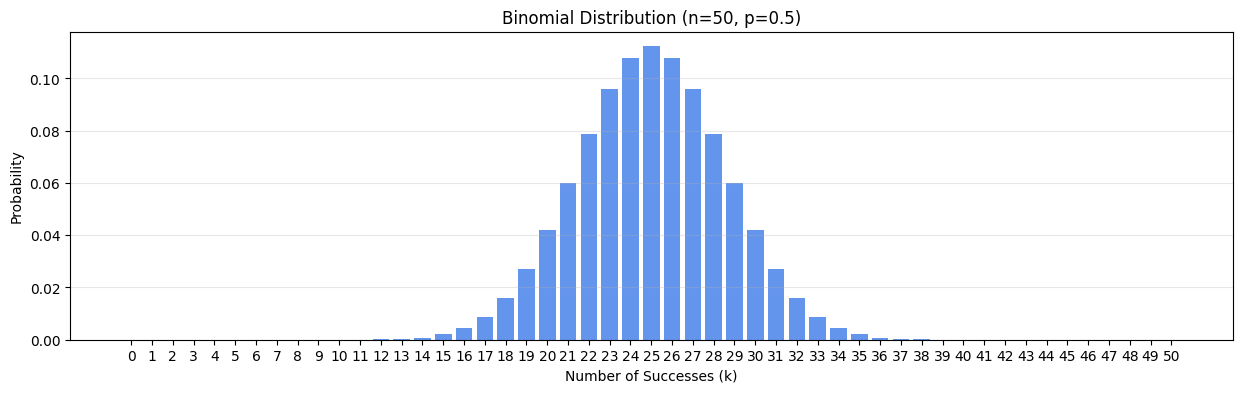

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# 설정
n = 50
p = 0.5

# x축: 성공 횟수 0부터 n까지
x = range(n + 1)
# y축: 각 성공 횟수에 대한 확률
probs = [binom.pmf(k, n, p) for k in x]

# 그래프 그리기
plt.figure(figsize=(15, 4))
plt.bar(x, probs, color='cornflowerblue')

plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.xticks(x) # x축 눈금 0~10 모두 표시
plt.grid(axis='y', alpha=0.3)

plt.show()

## 2. 시뮬레이션 매개변수 설정
| 변수 | 설명       | 갈톤 보드에서의 의미                 |
|------|------------|---------------------------------------|
| N    | 시행 횟수  | 못의 층(row) 개수                     |
| p    | 성공 확률  | 오른쪽으로 이동할 확률 (보통 0.5)     |
| M    | 시뮬레이션 횟수 | 떨어뜨리는 구슬의 개수          |


In [ ]:
from scipy.stats import binom

In [2]:
# --- 시뮬레이션 설정 ---
N = 15      # 못의 층 수 (시행 횟수)
p = 0.5     # 오른쪽으로 갈 확률 (성공 확률)
M = 20000   # 구슬의 개수 (시뮬레이션 횟수)

# 최종적으로 도달할 수 있는 위치는 0부터 N까지, 총 N+1개
bins = np.arange(N + 2) - 0.5

## 3. 이항 분포 시뮬레이션 실행
- numpy의 random.binomial 함수를 사용하여 $M$개의 구슬 각각이 $N$번의 시행 중 몇 번 성공(오른쪽으로 이동)했는지 계산합니다.

In [3]:
# M번의 시행을 통해 N번의 시행 중 성공 횟수를 계산
# outcomes 배열에는 0부터 N까지의 숫자가 M개 저장됨
outcomes = np.random.binomial(n=N, p=p, size=M)

# 결과 확인 (일부만 출력)
print(f"시뮬레이션 설정: N={N}, p={p}, M={M}")
print(f"첫 10개의 결과 (성공 횟수): {outcomes[:10]}")

시뮬레이션 설정: N=15, p=0.5, M=20000
첫 10개의 결과 (성공 횟수): [ 9  5  8  9  8  8 10  7  8  6]


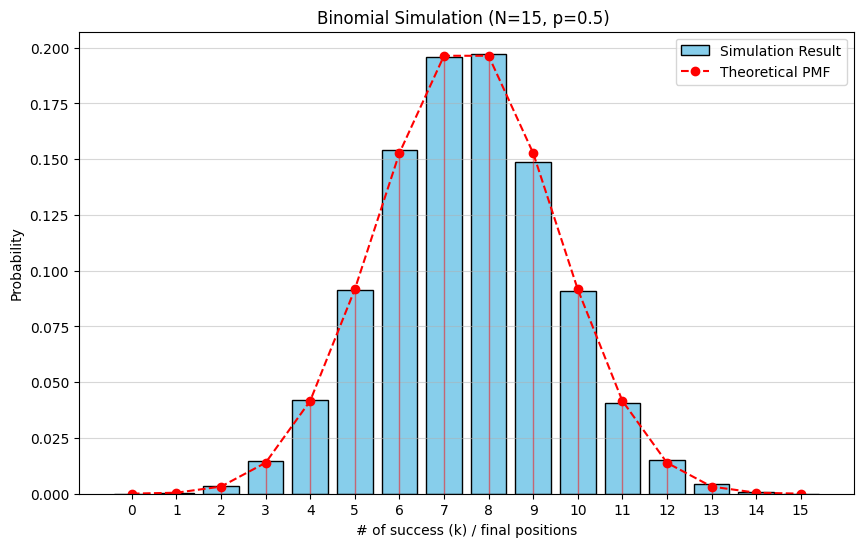

In [5]:
# --- 시각화 ---
plt.figure(figsize=(10, 6))

# 히스토그램 (시뮬레이션 결과)
# density=True는 y축을 확률밀도/확률로 정규화합니다.
plt.hist(outcomes, bins=bins, density=True, rwidth=0.8, color='skyblue', edgecolor='black', label='Simulation Result')

# 이론적인 이항 분포 (PMF) 라인 추가
# 이항 분포 B(N, p)에서 k번 성공할 확률 P(X=k)를 계산
k_values = np.arange(N + 1)
pmf_values = binom.pmf(k_values, N, p)
plt.plot(k_values, pmf_values, 'ro--', label='Theoretical PMF')
plt.vlines(k_values, 0, pmf_values, colors='r', linestyles='-', lw=1, alpha=0.5)


plt.title(f'Binomial Simulation (N={N}, p={p}) ')
plt.xlabel('# of success (k) / final positions')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

https://www.youtube.com/watch?v=vZMdTuz5JF4